In [2]:
## Step 1: Installing and Setting up required analysis tools

In [2]:
!pip install quandl
!pip install pytrends
!pip install Cryptory
!pip install statsmodels
!pip install plotly
!pip3 install numpy
!pip install chart-studio
!pip install yfinance
!pip install coinmarketcap
!pip install python-coinmarketcap


In [19]:
## Step 2 Accessing libraries, analytical, statistical tools

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import coinmarketcap
import coinmarketcapapi
from coinmarketcapapi import CoinMarketCapAPI
import os
from cryptory import Cryptory
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
from scipy import stats


from cryptory import Cryptory

import os
from itertools import product
from datetime import datetime

from plotly import tools
#import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go

import chart_studio.plotly as py
from chart_studio import plotly 
import plotly.offline as pyoff
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 7)
all_coins_names = ['btc', 'eth', 'xrp', 'bch', 'ltc', 'dash', 'xmr', 'etc', 'zec', 
                        'doge', 'rdd', 'vtc', 'ftc', 'nmc', 'blk','nvc']

In [8]:
## Step 3:  Access Crypto Library
help(Cryptory)

Help on class Cryptory in module cryptory.cryptory:

class Cryptory(builtins.object)
 |  Cryptory(from_date, to_date=None, ascending=False, fillgaps=True, timeout=10.0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, from_date, to_date=None, ascending=False, fillgaps=True, timeout=10.0)
 |      Initialise cryptory class
 |      
 |      Parameters
 |      ----------
 |      from_date : the starting date (as string) for the returned data;
 |          required format is %Y-%m-%d (e.g. "2017-06-21")
 |      to_date : the end date (as string) for the returned data;
 |          required format is %Y-%m-%d (e.g. "2017-06-21")
 |          Optional. If unspecified, it will default to the current day
 |      to_date : binary. Determines whether the returned dataframes are
 |          ordered by date in ascending or descending order 
 |          (defaults to False i.e. most recent first)
 |      fillgaps : binary. When data does not exist (e.g. weekends for stocks)
 |          should the 

In [ ]:
## Step 4: Accessing Data sets -  pull data from start of 2015 to present day

In [ ]:
## Step 5:  Main objetc definition and Accesing historical bitcoin prices from bitinfocharts

In [9]:
my_cryptory = Cryptory(from_date = "2015-02-01", to_date = "2022-05-11" )
btc_price_data=my_cryptory.extract_bitinfocharts("btc")                                                 
btc_price_data = btc_price_data.set_index('date')
btc_price_data

,btc_price
date,
2022-05-11,30593.000
2022-05-10,31334.000
2022-05-09,32700.000
...,...
2015-02-03,236.830
2015-02-02,226.795
2015-02-01,218.482


In [10]:
# Step 6: Additional historical bitcoin data from coinmarketcap

from cryptory import Cryptory
import pandas as pd
#pd.options.display.max_rows = 6
my_cryptory = Cryptory(from_date="2015-01-01")
my_cryptory.extract_coinmarketcap

import lxml.html
import pandas
import requests


def float_helper(string):
    try:
        return float(string)
    except ValueError:
        return None

def coinmarketcap_get_btc(start_date: str, end_date: str) -> pandas.DataFrame:
  url = f'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start={start_date}&end={end_date}'
#my_cryptory.extract_coinmarketcap("bitcoin")
my_cryptory.extract_bitinfocharts("btc")
#my_cryptory.extract_bitinfocharts("btc.marketcap")
#BTC_Ticker = yf.Ticker("BTC-USD")
#BTC_Data = BTC_Ticker.history(period="max")

,date,btc_price
0,2023-07-14,31126.000
1,2023-07-13,30689.000
2,2023-07-12,30586.000
...,...,...
3114,2015-01-03,303.591
3115,2015-01-02,314.346
3116,2015-01-01,315.626


In [84]:
# Option: Graphs configurations for Crypto Market capitalization
#plt.figure(figsize=(20,7))
#ax = plt.subplot(111)    
#plt.yticks(fontsize=14)    
#plt.xticks(fontsize=14)
#ax.spines["top"].set_visible(False)        
#ax.spines["right"].set_visible(False)    
#plt.grid(linewidth=0.2)
#plt.title('Bitcoin Market Capitalization (2015-2023)', fontsize=18)
#plt.plot(bitcoin.date,btc_marketcap.marketcap)
#plt.show()

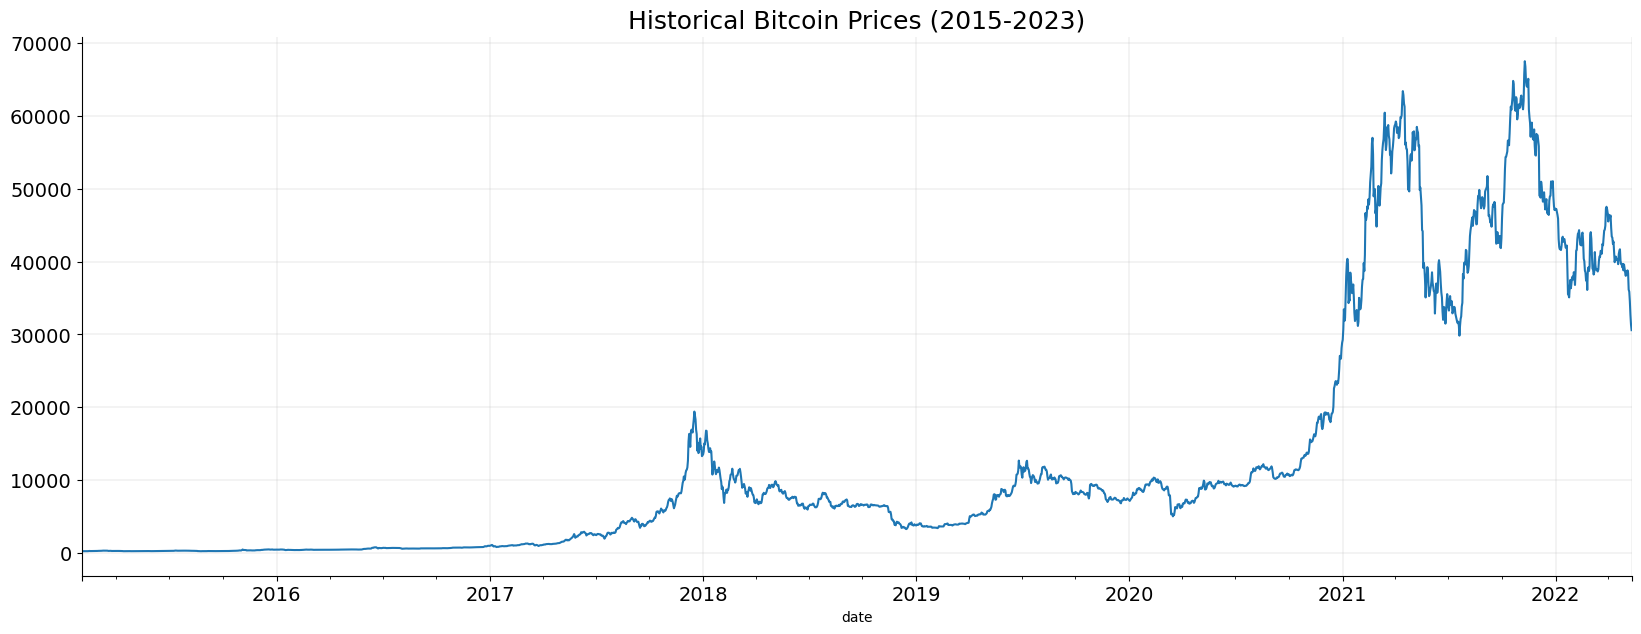

In [11]:
## Step 7: Graphs configurations for Cryto Historical trends 2015 to 2023
plt.figure(figsize=(20,7))
ax = plt.subplot(111)    
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)
ax.spines["top"].set_visible(False)        
ax.spines["right"].set_visible(False)
btc_price_data.btc_price.plot()
plt.grid(linewidth=0.2)
plt.title('Historical Bitcoin Prices (2015-2023)', fontsize=18)
plt.show()

In [12]:
# Step 8 Resampling frecuencies on monthly price, annual and quarterly
df_month = btc_price_data.resample('M').mean()

# Resampling to annual frequency
df_year = btc_price_data.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = btc_price_data.resample('Q-DEC').mean()

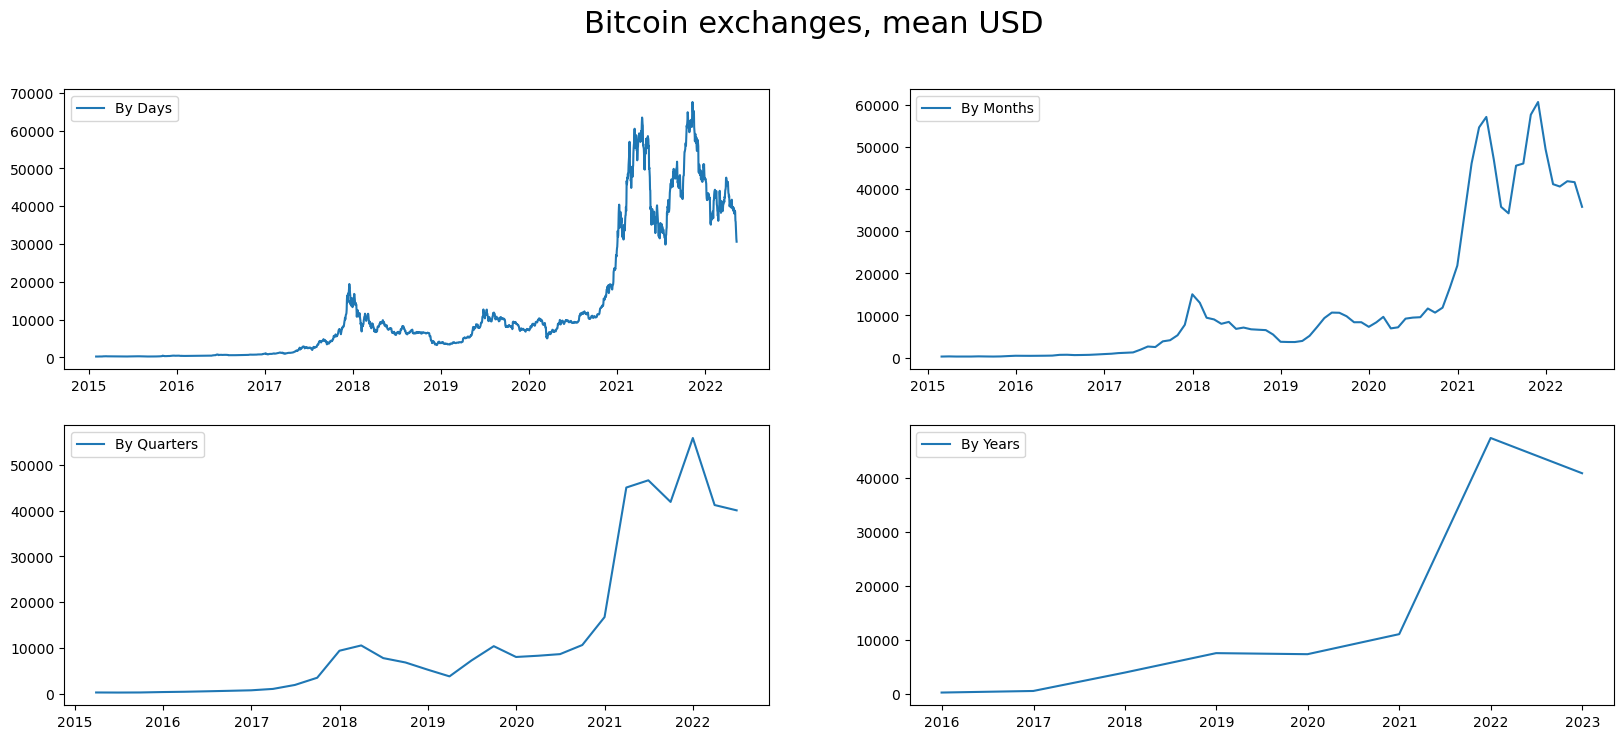

In [13]:
# Step 9 Graphs configurations for Crypto frecuencies
fig = plt.figure(figsize=[20, 8])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(btc_price_data.btc_price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.btc_price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.btc_price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.btc_price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

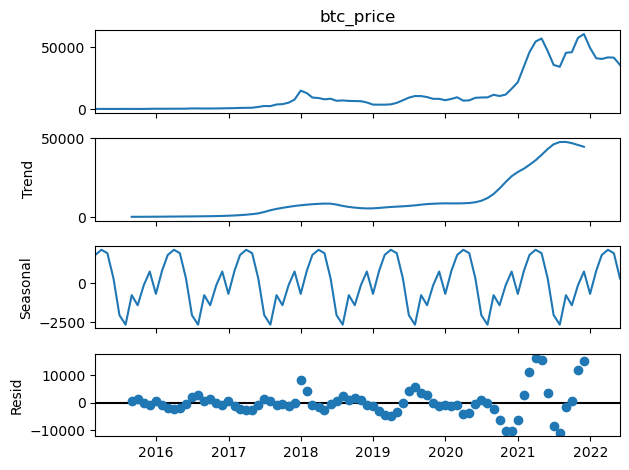

In [14]:
# Step 10 Graphs configurations for seasonal data decomposition
plt.figure(figsize=[20,8])
sm.tsa.seasonal_decompose(df_month.btc_price).plot()
plt.show()

In [16]:
# Step 11 Seasonality analysis parameters definition
def ADF(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.523840
p-value: 0.109781
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587
ADF Statistic: -1.108795
p-value: 0.711552
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585
ADF Statistic: -2.598566
p-value: 0.093294
Critical Values:
	1%: -3.522
	5%: -2.901
	10%: -2.588
ADF Statistic: -5.040136
p-value: 0.000018
Critical Values:
	1%: -3.522
	5%: -2.901
	10%: -2.588


<Figure size 2000x800 with 0 Axes>

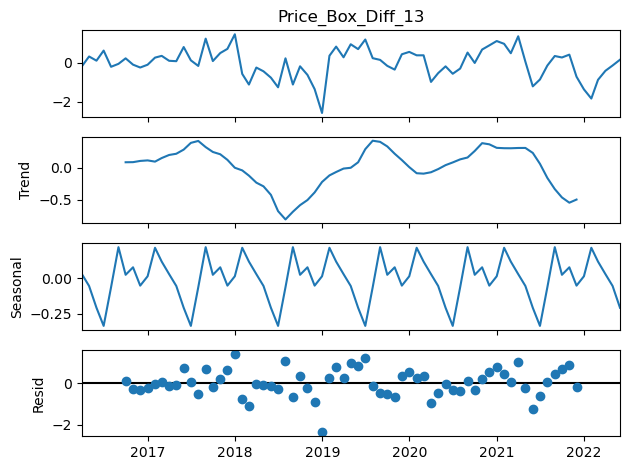

In [17]:
# Step 12 Seasonality analysis for bticoin market price per month, decomposition and vizualitation of results
ADF(df_month.btc_price)
df_month['Price_Box'], lmbda = stats.boxcox(df_month.btc_price)
ADF(df_month.Price_Box)
df_month['Price_Box_Diff_12'] = df_month.Price_Box - df_month.Price_Box.shift(12)
ADF(df_month.Price_Box_Diff_12[12:])
df_month['Price_Box_Diff_13'] = df_month.Price_Box_Diff_12 - df_month.Price_Box_Diff_12.shift(1)
ADF(df_month.Price_Box_Diff_13[13:])
plt.figure(figsize=[20,8])
sm.tsa.seasonal_decompose(df_month.Price_Box_Diff_13[13:]).plot()
plt.show()

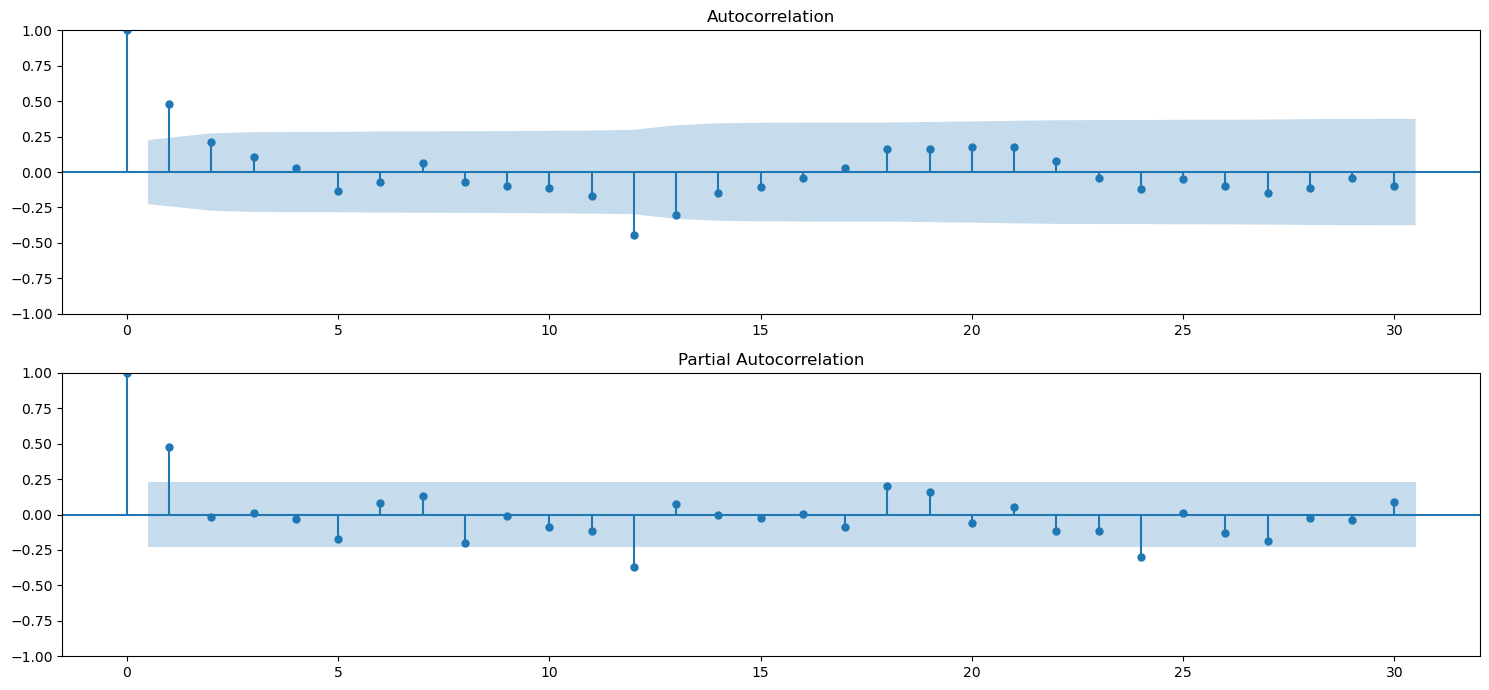

In [25]:
# Step 13 Approximation of parameters using correlation plots 
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Price_Box_Diff_13[13:].values.squeeze(), lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Price_Box_Diff_13[13:].values.squeeze(), lags=30, ax=ax)
plt.tight_layout()
plt.show()

In [26]:
# Step 14 Parameters for approximation definition using correlation

Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [28]:
# Step 15 Model Selection and fitting
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for p in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Price_Box, order=(p[0], d, p[1]), 
                                        seasonal_order=(p[2], D, p[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', p)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = p
    results.append([p, model.aic])
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
22  (1, 0, 2, 0)  123.293402
19  (1, 0, 0, 1)  124.500785
7   (0, 1, 0, 1)  124.652805
23  (1, 0, 2, 1)  124.668876
10  (0, 1, 2, 0)  124.701923
                                     SARIMAX Results                                      
Dep. Variable:                          Price_Box   No. Observations:                   88
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 -57.647
Date:                            Fri, 14 Jul 2023   AIC                            123.293
Time:                                    10:16:15   BIC                            132.563
Sample:                                02-28-2015   HQIC                           126.995
                                     - 05-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

ADF Statistic: -8.337232
p-value: 0.000000
Critical Values:
	1%: -3.522
	5%: -2.901
	10%: -2.588


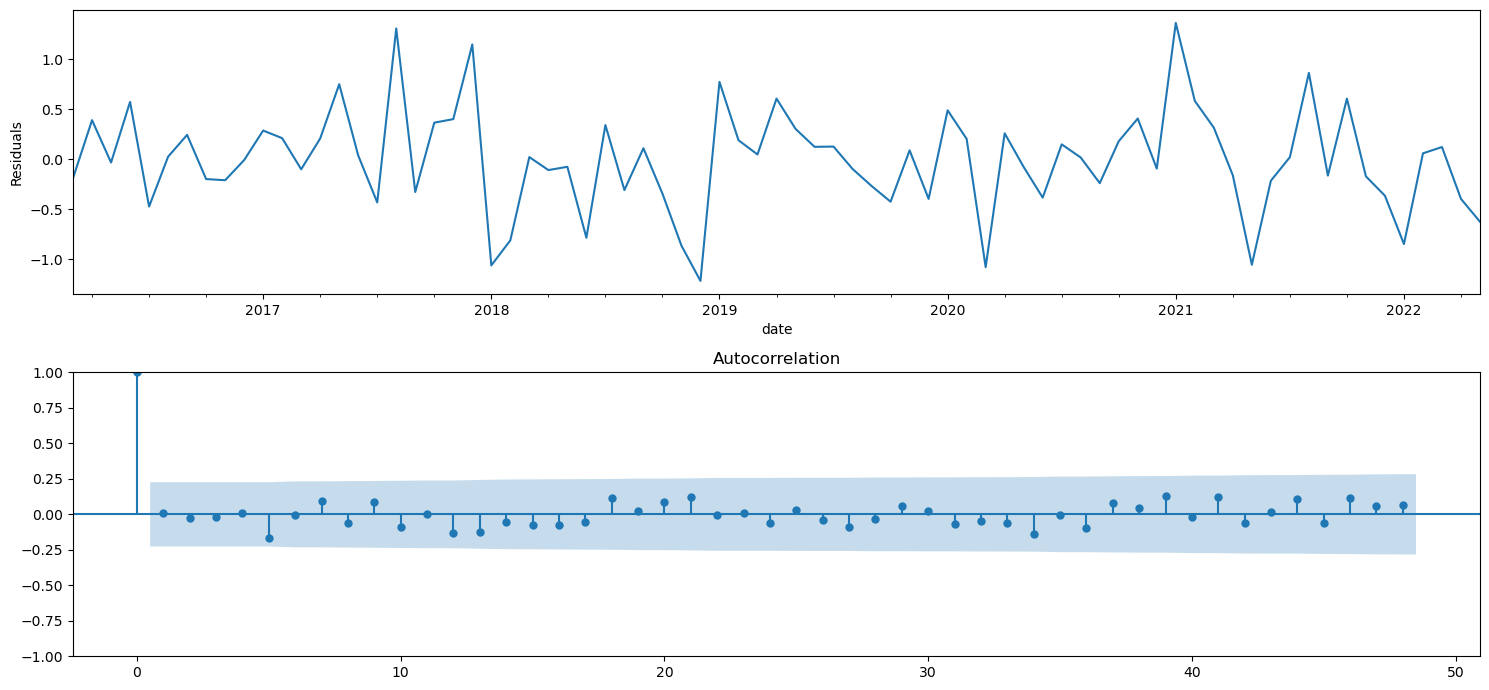

In [29]:
# Step 16 STL-correlational decomposition and vizualization of correlational results and residuals
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

ADF(best_model.resid[13:])

plt.tight_layout()
plt.show()

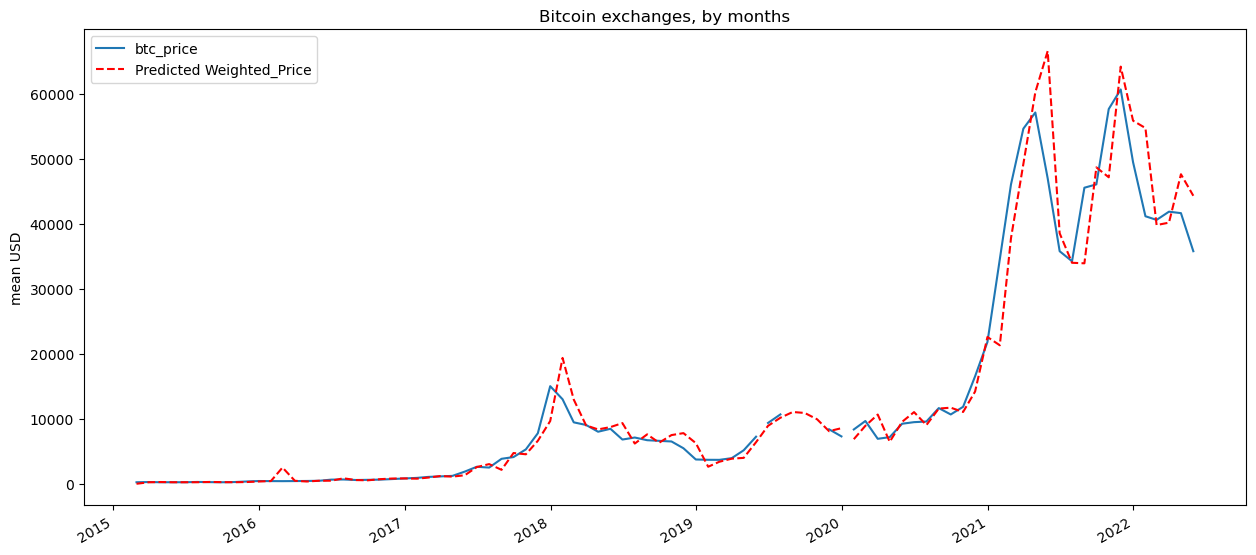

In [31]:
# Step 17 Model prediction 

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))
df_month2 = df_month[['btc_price']]
date_list = [datetime(2019, 6, 30), datetime(2019, 7, 31), datetime(2019, 8, 31), datetime(2019, 9, 30), 
             datetime(2019, 10, 31), datetime(2019, 11, 30), datetime(2019, 12, 31), datetime(2020, 1, 31),
             datetime(2020, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=160), lmbda)
plt.figure(figsize=(15,7))
df_month2.btc_price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()